In [2]:
! pip install -q kaggle

In [16]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"faraukeka","key":"3ea0e99d451de5bdfd0126206e89b885"}'}

In [17]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [96]:
!kaggle datasets download -d meirnizri/covid19-dataset/

Dataset URL: https://www.kaggle.com/datasets/meirnizri/covid19-dataset/versions/
License(s): CC0-1.0
  0% 0.00/4.66M [00:00<?, ?B/s]
100% 4.66M/4.66M [00:00<00:00, 51.9MB/s]


In [97]:
!unzip 'covid19-dataset.zip'

Archive:  covid19-dataset.zip
  inflating: Covid Data.csv          


siapkan yang kita  butuhkan

In [98]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential, layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

df = pd.read_csv("Covid Data.csv")

1. Praproses data

In [100]:
df.PREGNANT.value_counts()

,count
PREGNANT,
97,523511
2,513179
1,8131
98,3754


In [105]:
df.loc[:, 'PREGNANT'] = df.loc[:, 'PREGNANT'].replace(97, 2)
df.loc[:, 'PREGNANT'] = df.loc[:, 'PREGNANT'].replace(98, np.NAN)
df.loc[:, 'PREGNANT'] = df.loc[:, 'PREGNANT'].replace(2, 0)

df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED
0,2,1,1,1,NaN,1.0,65,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,NaN,1
1,2,1,2,1,NaN,1.0,72,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5,NaN,1
2,2,1,2,2,1.0,0.0,55,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,1
3,2,1,1,1,NaN,0.0,53,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,NaN,1
4,2,1,2,1,NaN,0.0,68,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,NaN,1


In [104]:
var = df.columns[(df.nunique() == 3) | (df.nunique() == 4)].tolist()
df.loc[:, var] = df.loc[:, var].replace([97, 98, 99], np.NAN)
df.loc[:, var] = df.loc[:, var].replace(2, 0)

df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED
0,2,1,1,1,NaN,1.0,65,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,NaN,1
1,2,1,2,1,NaN,1.0,72,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5,NaN,1
2,2,1,2,2,1.0,0.0,55,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,1
3,2,1,1,1,NaN,0.0,53,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,NaN,1
4,2,1,2,1,NaN,0.0,68,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,NaN,1


In [103]:
df['DIED'] = np.where(df['DATE_DIED'] == '9999-99-99', 0, 1)
df.drop(columns='DATE_DIED', inplace=True)

df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED
0,2,1,1,1,NaN,1.0,65,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,NaN,1
1,2,1,2,1,NaN,1.0,72,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5,NaN,1
2,2,1,2,2,1.0,0.0,55,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,1
3,2,1,1,1,NaN,0.0,53,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,NaN,1
4,2,1,2,1,NaN,0.0,68,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,NaN,1


In [106]:
df.drop(columns=['INTUBED','ICU'], inplace=True)

kita lakukan encoding

In [108]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

categorical_cols = ["MEDICAL_UNIT", "CLASIFFICATION_FINAL"]
df_categorical = encoder.fit_transform(df[categorical_cols])
categorical_names = encoder.get_feature_names_out(categorical_cols)
df_categorical = pd.DataFrame(df_categorical, columns=categorical_names)

df_categorical.head()

,MEDICAL_UNIT_1,MEDICAL_UNIT_2,MEDICAL_UNIT_3,MEDICAL_UNIT_4,MEDICAL_UNIT_5,MEDICAL_UNIT_6,MEDICAL_UNIT_7,MEDICAL_UNIT_8,MEDICAL_UNIT_9,MEDICAL_UNIT_10,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13,CLASIFFICATION_FINAL_1,CLASIFFICATION_FINAL_2,CLASIFFICATION_FINAL_3,CLASIFFICATION_FINAL_4,CLASIFFICATION_FINAL_5,CLASIFFICATION_FINAL_6,CLASIFFICATION_FINAL_7
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [109]:
df = pd.concat([df, df_categorical], axis=1)
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,...,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13,CLASIFFICATION_FINAL_1,CLASIFFICATION_FINAL_2,CLASIFFICATION_FINAL_3,CLASIFFICATION_FINAL_4,CLASIFFICATION_FINAL_5,CLASIFFICATION_FINAL_6,CLASIFFICATION_FINAL_7
0,2,1,1,1,1.0,65,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,1,2,1,1.0,72,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,1,2,2,0.0,55,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2,1,1,1,0.0,53,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2,1,2,1,0.0,68,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [111]:
print("NIlai Duplikat: ")
df.duplicated().sum()

NIlai Duplikat: 


851823

In [112]:
df.drop_duplicates(inplace=True)
print("NIlai Duplikat: ")
df.duplicated().sum()

NIlai Duplikat: 


0

In [114]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df.AGE = scaler.fit_transform(df.AGE.values.reshape(-1,1))

In [117]:
X = df[['MEDICAL_UNIT_1','MEDICAL_UNIT_13']]
y = df['CLASIFFICATION_FINAL_4']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kita train datanya

In [118]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [119]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

kita buat model sequential

In [120]:
model = Sequential()

In [121]:
model.add(layers.Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [122]:
model.compile(optimizer='adam',
              loss = 'mse',
             metrics = ['accuracy'])

In [123]:
history = model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/5
9838/9838 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9919 - loss: 0.0151 - val_accuracy: 0.9917 - val_loss: 0.0083
Epoch 2/5
9838/9838 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9916 - loss: 0.0083 - val_accuracy: 0.9917 - val_loss: 0.0083
Epoch 3/5
9838/9838 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9921 - loss: 0.0078 - val_accuracy: 0.9917 - val_loss: 0.0083
Epoch 4/5
9838/9838 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9918 - loss: 0.0081 - val_accuracy: 0.9917 - val_loss: 0.0083
Epoch 5/5
9838/9838 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9917 - loss: 0.0083 - val_accuracy: 0.9917 - val_loss: 0.0083


evaluasi

In [124]:
if isinstance(y_test.iloc[0], (int, float)):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print("R-squared Score:", r2)
else:
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

1230/1230 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
R-squared Score: -0.00019609550711052748


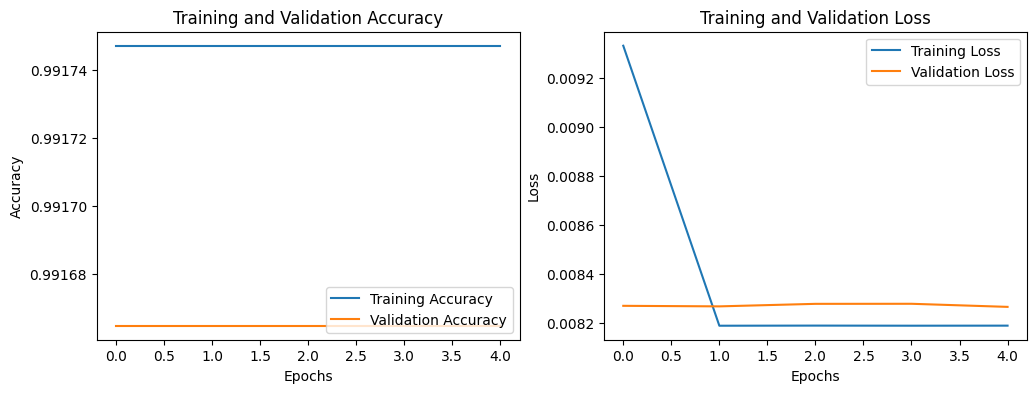

In [125]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()